Enter start date (YYYY-MM-DD): 2021-01-01
Enter end date (YYYY-MM-DD): 2022-01-01


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data saved to RELIANCE_data.csv


Data saved to TCS_data.csv


[*********************100%***********************]  1 of 1 completed


Data saved to HDFCBANK_data.csv


[*********************100%***********************]  1 of 1 completed


Data saved to INFY_data.csv
{'RELIANCE.NS': Price                        Adj Close        Close         High          Low  \
Ticker                     RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS   
Date                                                                            
2021-01-01 00:00:00+00:00   901.639587   917.230957   921.615173   914.692688   
2021-01-04 00:00:00+00:00   903.159424   918.776978   922.492004   908.231689   
2021-01-05 00:00:00+00:00   891.931396   907.354858   915.431091   902.693665   
2021-01-06 00:00:00+00:00   868.409363   883.426086   907.308655   879.226440   
2021-01-07 00:00:00+00:00   867.002991   881.995422   897.617188   879.226440   
...                                ...          ...          ...          ...   
2021-12-27 00:00:00+00:00  1082.799683  1093.869995  1097.446655  1083.647827   
2021-12-28 00:00:00+00:00  1095.659302  1106.861206  1109.837891  1095.162231   
2021-12-29 00:00:00+00:00  1097.532471  1108.753418  1116.368164 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step
Predictions saved to HDFCBANK_tcn_predictions.csv
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 9.5211
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.4814
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2576
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0675
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0657
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0247
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0300
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0231
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0183
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0175
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0204
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0206
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0380
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0223
Epoch 15/2

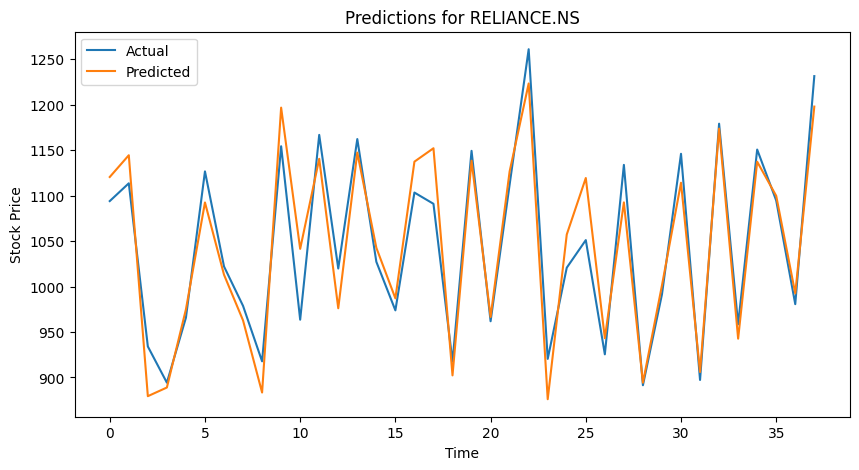

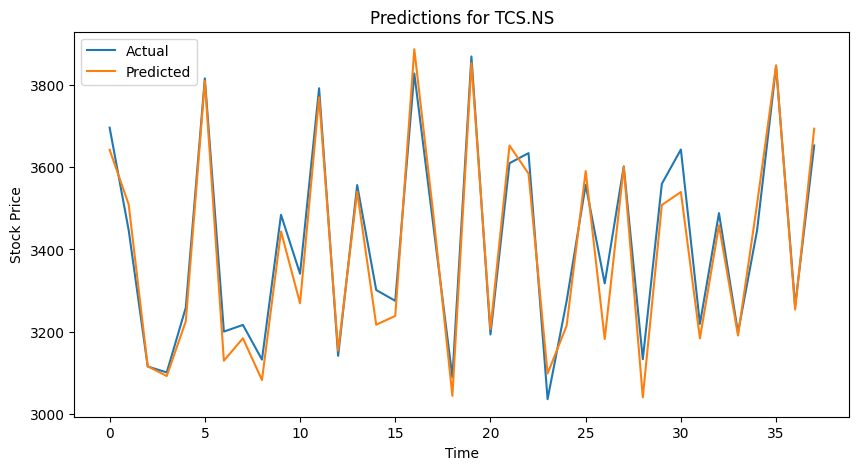

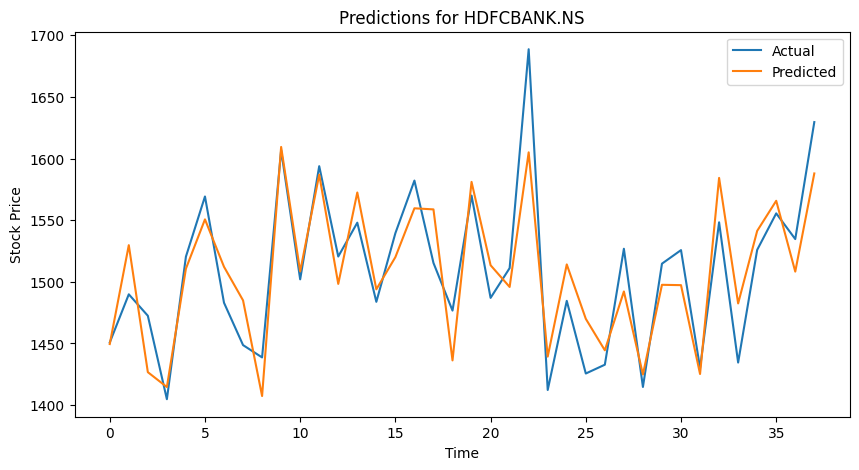

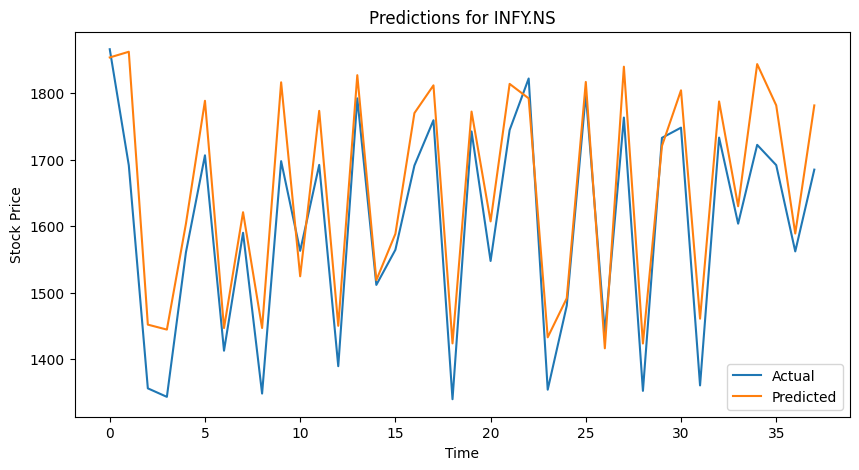

Metrics for RELIANCE.NS:
Mean Absolute Error (MAE): 25.72309795178865
Mean Squared Error (MSE): 1007.6417069000826
Root Mean Squared Error (RMSE): 31.74337264532681
R² Score: 0.9028698166821911
Directional Accuracy: 94.5945945945946%
Metrics for TCS.NS:
Mean Absolute Error (MAE): 41.62827019942432
Mean Squared Error (MSE): 2645.9949669006587
Root Mean Squared Error (RMSE): 51.43923567570438
R² Score: 0.9554576011246598
Directional Accuracy: 94.5945945945946%
Metrics for HDFCBANK.NS:
Mean Absolute Error (MAE): 24.797514262952284
Mean Squared Error (MSE): 884.8922152436866
Root Mean Squared Error (RMSE): 29.747137933651477
R² Score: 0.783133679789785
Directional Accuracy: 91.8918918918919%
Metrics for INFY.NS:
Mean Absolute Error (MAE): 60.51533588610199
Mean Squared Error (MSE): 5021.164922386411
Root Mean Squared Error (RMSE): 70.86017867876436
R² Score: 0.8081404157311947
Directional Accuracy: 94.5945945945946%


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Dense, Input, Flatten
from tensorflow.keras.layers import TimeDistributed, Conv1D, Activation
from tensorflow.keras.layers import LayerNormalization, Add
from tensorflow.keras.layers import Lambda
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define Sensex tickers
sensex_tickers = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS"]

# Input dates
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Function to download data
def download_data(ticker):
    print(f'Downloading data for {ticker}')
    data = yf.download(ticker, start=start_date, end=end_date)
    if not data.empty:
        filename = f"{ticker.replace('.NS', '')}_data.csv"
        data.to_csv(filename)
        print(f'Data saved to {filename}')
        return data
    else:
        print(f'No data available for {ticker}')
        return None

# Download data for all tickers
stock_data = {}
for ticker in sensex_tickers:
    data = download_data(ticker)
    if data is not None:
        stock_data[ticker] = data

# Display stock data for reference
print(stock_data)

# Function to preprocess data
def preprocess_data(data, look_back=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close']])

    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

# Preprocess all stocks data
preprocessed_data = {}
for ticker, data in stock_data.items():
    X, y, scaler = preprocess_data(data)
    preprocessed_data[ticker] = (X, y, scaler)

# Define a residual block for the TCN
def residual_block_tcn(x, dilation_rate):
    previous_block_activation = x  # For the residual connection

    # Causal convolution
    x = LayerNormalization()(x)
    x = Conv1D(filters=64, kernel_size=3, padding="causal", dilation_rate=dilation_rate)(x)
    x = Activation("relu")(x)

    x = Conv1D(filters=64, kernel_size=3, padding="causal", dilation_rate=dilation_rate)(x)

    # Residual connection
    x = Add()([x, previous_block_activation])
    return x

# Function to build TCN model
def build_tcn_model(input_shape, num_filters=64, kernel_size=3, dilations=[1, 2, 4, 8]):
    inputs = Input(shape=input_shape)
    x = inputs

    # Add residual blocks with increasing dilation rates
    for dilation_rate in dilations:
        x = residual_block_tcn(x, dilation_rate)

    # Flatten and add dense layers for output
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and predict function for TCN
def train_and_predict_tcn(ticker, X, y, scaler, epochs=20, batch_size=32):
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = build_tcn_model(X_train.shape[1:])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Save predictions and actual data to CSV
    result_df = pd.DataFrame({'Actual': actual.flatten(), 'Predicted': predictions.flatten()})
    result_filename = f"{ticker.replace('.NS', '')}_tcn_predictions.csv"
    result_df.to_csv(result_filename, index=False)
    print(f'Predictions saved to {result_filename}')

    return result_df

# Train and predict for all tickers with TCN
results_tcn = {}
for ticker, (X, y, scaler) in preprocessed_data.items():
    results_tcn[ticker] = train_and_predict_tcn(ticker, X, y, scaler)

# Plot predictions
def plot_predictions(ticker, result_df):
    plt.figure(figsize=(10, 5))
    plt.plot(result_df['Actual'], label="Actual")
    plt.plot(result_df['Predicted'], label="Predicted")
    plt.title(f"Predictions for {ticker}")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Plot predictions for all tickers with TCN
for ticker, result_df in results_tcn.items():
    plot_predictions(ticker, result_df)

# Evaluate predictions
def evaluate_predictions(ticker, result_df):
    # Calculate MAE, MSE, RMSE, and R²
    mae = mean_absolute_error(result_df['Actual'], result_df['Predicted'])
    mse = mean_squared_error(result_df['Actual'], result_df['Predicted'])
    rmse = np.sqrt(mse)
    r2 = r2_score(result_df['Actual'], result_df['Predicted'])

    # Calculate Directional Accuracy
    actual_direction = np.sign(result_df['Actual'].diff().dropna())
    predicted_direction = np.sign(result_df['Predicted'].diff().dropna())
    directional_accuracy = (actual_direction == predicted_direction).mean() * 100

    # Print metrics
    print(f"Metrics for {ticker}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")
    print(f"Directional Accuracy: {directional_accuracy}%")

    # Return metrics as a dictionary
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "Directional Accuracy": directional_accuracy
    }

# Evaluate predictions for all tickers
metrics = {}
for ticker, result_df in results_tcn.items():
    metrics[ticker] = evaluate_predictions(ticker, result_df)
